## Lending Club Case Study

In [1]:
# pandas libraries
import pandas as pd

# libraries for visualisation
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Reading the loan.csv file
raw_data = pd.read_csv('loan.csv')


C:\Users\raora\AppData\Local\Temp\ipykernel_14980\2974524446.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data = pd.read_csv('loan.csv')


#### Getting to know about the read data

In [3]:
# Getting to know about the shape of the read dataframe
print(raw_data.shape)

# To have an idea about the columns
raw_data.head()

(39717, 111)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### Data Preparation

In [4]:
# Removing the loan_status = Current
raw_data = raw_data[raw_data["loan_status"] != "Current"]
raw_data.shape

(38577, 111)

In [5]:
# Checking for the column-wise null values
raw_data.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               38577
total_bal_ex_mort             38577
total_bc_limit                38577
total_il_high_credit_limit    38577
Length: 111, dtype: int64

In [6]:
# Also checking the summary of each column to check its validity
pd.set_option('display.max_columns', 150)
raw_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.857700e+04,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,38577.000000,38577.000000,13672.000000,2740.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.0,38577.0,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38521.0,0.0,38577.0,0.0,0.0,0.0,38577.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38521.0,38577.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37880.000000,38538.0,0.0,0.0,0.0,0.0
mean,6.763787e+05,8.422843e+05,11047.025430,10784.058506,10222.481123,322.466318,6.877797e+04,13.272727,0.146668,0.871737,35.882534,69.260949,9.275423,0.055422,13289.489826,22.052648,0.0,0.0,11866.970365,11271.196153,9648.322898,2119.243370,1.368634,98.035545,12.772728,2746.243218,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043479,0.0,NaN,NaN,NaN,NaN
std,2.092639e+05,2.644519e+05,7348.441646,7090.306027,7022.720644,208.639215,6.421868e+04,6.673044,0.492271,1.071546,22.028093,43.987761,4.401588,0.237804,15866.492241,11.425861,0.0,0.0,8809.856227,8700.845592,7009.381200,2389.499511,7.315880,698.650182,150.836853,4494.648131,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204583,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.120330e+05,6.611310e+05,5300.000000,5200.000000,5000.000000,165.740000,4.000000e+04,8.130000,0.000000,0.000000,18.000000,19.750000,6.000000,0.000000,3650.000000,13.000000,0.0,0.0,5513.497338,5019.590000,4500.000000,643.990000,0.000000,0.000000,0.000000,217.420000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.564230

#### Column-wise data cleaning - Checking the columns with higher missing values of 75% of the total length and dropping those

In [7]:
# Getting the names of columns which has large missing values
mlist = raw_data.columns[(raw_data.isnull().sum()/len(raw_data)) > 0.75]

# Confirm that the mlist columns have majority NaN values
print(raw_data[mlist].mean())

mths_since_last_record            69.260949
next_pymnt_d                            NaN
mths_since_last_major_derog             NaN
annual_inc_joint                        NaN
dti_joint                               NaN
verification_status_joint               NaN
tot_coll_amt                            NaN
tot_cur_bal                             NaN
open_acc_6m                             NaN
open_il_6m                              NaN
open_il_12m                             NaN
open_il_24m                             NaN
mths_since_rcnt_il                      NaN
total_bal_il                            NaN
il_util                                 NaN
open_rv_12m                             NaN
open_rv_24m                             NaN
max_bal_bc                              NaN
all_util                                NaN
total_rev_hi_lim                        NaN
inq_fi                                  NaN
total_cu_tl                             NaN
inq_last_12m                    

In [8]:
# From the above the column mths_since_last_record has non-null mean. So confirming no of cells with NaN before dropping
raw_data["mths_since_last_record"].isna().sum()

35837

___From the above 2 verifications, the columns in the list mlist can be dropped as it doesn't contribute anything to the information on deciding the default factors___

In [9]:
# Dropping the columns in mlist
raw_data.drop(mlist, axis = 'columns', inplace = True)


In [10]:
raw_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

#### The column data between the fresh applicant and that of the historical data is the only valid data which will provide us some information on the probable default applicant. We can drop-off the remaining columns. The columns to be dropped is listed in the below uncommon_list.

In [11]:
uncommon_list = ["delinq_2yrs","earliest_cr_line","inq_last_6mths","open_acc","pub_rec","revol_bal","revol_util","total_acc","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","last_credit_pull_d","application_type"]

# Remove the below
list(set(raw_data.columns) & set(uncommon_list))

['last_pymnt_d',
 'application_type',
 'last_pymnt_amnt',
 'total_acc',
 'pub_rec',
 'earliest_cr_line',
 'out_prncp_inv',
 'revol_util',
 'collection_recovery_fee',
 'inq_last_6mths',
 'total_rec_int',
 'last_credit_pull_d',
 'total_pymnt_inv',
 'revol_bal',
 'out_prncp',
 'delinq_2yrs',
 'total_pymnt',
 'recoveries',
 'open_acc',
 'total_rec_prncp',
 'total_rec_late_fee']

In [12]:
# Dropping the uncommon columns from the raw_data dataframe and making changes permanent with inplace = True. Dropping was confirmed with no inplace parameter before setting inplace = True
raw_data.drop(raw_data[uncommon_list], axis = 'columns', inplace = True)

# Also remove other not so useful columns based on the info from the output of cell 6(describe())
raw_data.drop(["id" ,"member_id","pymnt_plan","url","desc","pymnt_plan","initial_list_status","emp_title","emp_title","title", "mths_since_last_delinq","collections_12_mths_ex_med","policy_code","acc_now_delinq", "chargeoff_within_12_mths", "delinq_amnt", "tax_liens", "pub_rec_bankruptcies"], axis = 'columns', inplace = True)

In [13]:
# Re-check the shape to confirm the deletion of columns
raw_data.shape

(38577, 18)

#### Row-wise data cleaning - Checking the rows with higher missing values of 75% of the total length and dropping those

In [14]:
# Dropping rows which contains less than minimun thresh number of non-NaN values, which in that case will not infer about defaults
raw_data.dropna( axis = 'index', thresh=int(raw_data.shape[1]*0.75), inplace = True)

# Confirming any deletion has happened in rows
raw_data.shape

(38577, 18)

#### Renaming the dataframe in a memory efficient way for convenience(https://nedbatchelder.com/text/names.html)

In [15]:
# Renaming it as suff_data(sufficient data) indicating the sufficiency of information and checking the shape.
suff_data = raw_data
suff_data.shape

(38577, 18)

In [16]:
# Checking the datatypes of suff_data column to make changes required on it so that its suitable for computation
suff_data.dtypes

loan_amnt                int64
funded_amnt              int64
funded_amnt_inv        float64
term                    object
int_rate                object
installment            float64
grade                   object
sub_grade               object
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
issue_d                 object
loan_status             object
purpose                 object
zip_code                object
addr_state              object
dti                    float64
dtype: object

In [17]:
# For visual inspection for making changes
suff_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,11.20


` Cleaning term column`

In [18]:
# Checking the unique values of the column term to clean it.
suff_data.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [19]:
# Stripping the whitespaces around term, converting column to int64 and then removing months
suff_data.term = suff_data.term.apply(lambda x: int((x.strip()).replace(" months", '')) )

In [20]:
# Renaming the term appropriately after removing months in cells
suff_data.rename(columns = {'term':'term in months'},inplace = True)
suff_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term in months,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti
0,5000,5000,4975.0,36,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65
1,2500,2500,2500.0,60,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00
2,2400,2400,2400.0,36,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72
3,10000,10000,10000.0,36,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00
5,5000,5000,5000.0,36,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,11.20


` Cleaning int_rate column`

In [21]:
# Checking once before cleaning
suff_data['int_rate'].unique()

array(['10.65%', '15.27%', '15.96%', '13.49%', '7.90%', '18.64%',
       '21.28%', '12.69%', '14.65%', '9.91%', '16.29%', '6.03%', '11.71%',
       '12.42%', '14.27%', '16.77%', '7.51%', '8.90%', '18.25%', '6.62%',
       '19.91%', '17.27%', '17.58%', '21.67%', '19.42%', '20.89%',
       '20.30%', '23.91%', '19.03%', '23.13%', '22.74%', '22.35%',
       '22.06%', '24.11%', '6.00%', '23.52%', '22.11%', '7.49%', '11.99%',
       '5.99%', '10.99%', '9.99%', '18.79%', '11.49%', '8.49%', '15.99%',
       '16.49%', '6.99%', '12.99%', '15.23%', '14.79%', '5.42%', '10.59%',
       '17.49%', '15.62%', '19.29%', '13.99%', '18.39%', '16.89%',
       '17.99%', '20.99%', '22.85%', '19.69%', '20.62%', '20.25%',
       '21.36%', '23.22%', '21.74%', '22.48%', '23.59%', '12.62%',
       '18.07%', '11.63%', '7.91%', '7.42%', '11.14%', '20.20%', '12.12%',
       '19.39%', '16.11%', '17.54%', '22.64%', '13.84%', '16.59%',
       '17.19%', '12.87%', '20.69%', '9.67%', '21.82%', '19.79%',
       '18.49%', '

In [22]:
# Stripping the whitespaces around int_rate, converting column to float64 and then removing months
suff_data['int_rate'] = suff_data['int_rate'].apply(lambda x: float(x.replace('%', '')) )

# Renaming the term appropriately after removing % in cells
suff_data.rename(columns = {'int_rate':'int_rate(%)'},inplace = True)
suff_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term in months,int_rate(%),installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65
1,2500,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00
5,5000,5000,5000.0,36,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,11.20


In [23]:
suff_data.dtypes

loan_amnt                int64
funded_amnt              int64
funded_amnt_inv        float64
term in months           int64
int_rate(%)            float64
installment            float64
grade                   object
sub_grade               object
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
issue_d                 object
loan_status             object
purpose                 object
zip_code                object
addr_state              object
dti                    float64
dtype: object

` To derive month and year column from issue_d column`

In [24]:
# Separating the month and year from the issue_d field
suff_data["month"] = (suff_data["issue_d"]).apply(lambda x: (pd.to_datetime(x, format='%b-%y', yearfirst=False).month))
suff_data["year"] = (suff_data["issue_d"]).apply(lambda x: (pd.to_datetime(x, format='%b-%y', yearfirst=False).year))

In [25]:
# Dropping the issue_d column as we have derived the information in 2 separate columns
suff_data.drop(["issue_d"], axis = 'columns', inplace = True)

`Cleaning emp_length column`

In [26]:
# Checking once before cleaning
suff_data['emp_length'].unique()

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years',
       nan], dtype=object)

In [27]:
suff_data['emp_length'].isnull().sum()

1033

In [28]:
suff_data['emp_length'].describe()

count         37544
unique           11
top       10+ years
freq           8488
Name: emp_length, dtype: object

In [29]:
pd.set_option('display.max_columns', 20)
suff_data.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term in months,int_rate(%),installment,annual_inc,dti,month,year
count,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,38577.000000,38577.000000
mean,11047.025430,10784.058506,10222.481123,41.898437,11.932219,322.466318,6.877797e+04,13.272727,7.114757,2010.309070
std,7348.441646,7090.306027,7022.720644,10.333136,3.691327,208.639215,6.421868e+04,6.673044,3.408523,0.882658
min,500.000000,500.000000,0.000000,36.000000,5.420000,15.690000,4.000000e+03,0.000000,1.000000,2007.000000
25%,5300.000000,5200.000000,5000.000000,36.000000,8.940000,165.740000,4.000000e+04,8.130000,4.000000,2010.000000
50%,9600.000000,9550.000000,8733.440000,36.000000,11.710000,277.860000,5.886800e+04,13.370000,7.000000,2011.000000
75%,15000.000000,15000.000000,14000.000000,36.000000,14.380000,425.550000,8.200000e+04,18.560000,10.000000,2011.000000
max,35000.000000,35000.000000,35000.000000,60.000000,24.400000,1305.190000,6.000000e+06,29.990000,12.000000,2011.000000


In [30]:
suff_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term in months',
       'int_rate(%)', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'zip_code', 'addr_state', 'dti', 'month', 'year'],
      dtype='object')

### Data Visualisation and Analysis

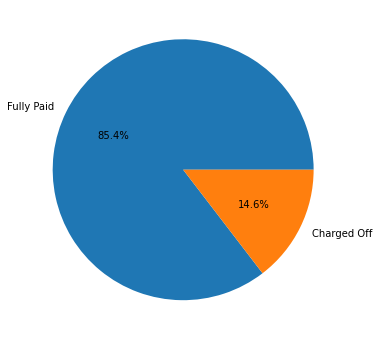

In [31]:
suff_data["loan_status"].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6,6), label='')
plt.show()

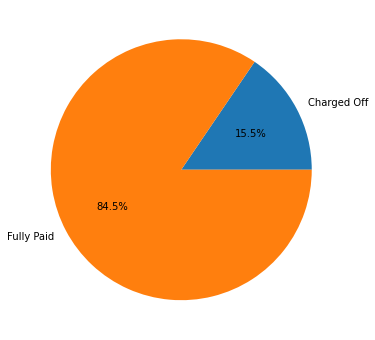

In [32]:
suff_data.groupby("loan_status")["funded_amnt_inv"].sum().plot(kind='pie', autopct='%1.1f%%', figsize=(6,6), label='')
plt.show()

### Inference1 - Around 15% of the application and the loan amount is defaulted and needs better scrutiny of                  application

### Univariate Analysis

<font color = blue> Analysing the applied, approved and invested loan amount </font>

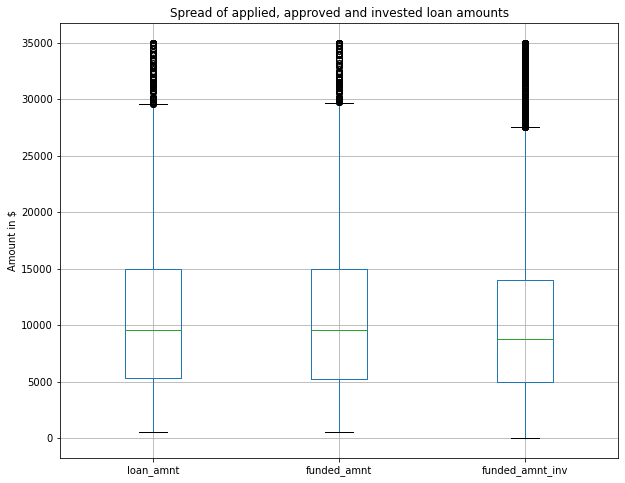

In [33]:
suff_data[['loan_amnt', 'funded_amnt', 'funded_amnt_inv']].boxplot(figsize=(10,8))
plt.title('Spread of applied, approved and invested loan amounts')
plt.ylabel('Amount in $')
plt.show()

1. Most of the loan applications are in the range of 5K to 15K 
2. The approved loan amount ia also in the same range
3. The Invested loans are more or less smaller than the approved loan amount
4. Helps in binning(Derived parameter) the lended loan according to the distribution

In [34]:
# Creating borrowed amount label based on the percentiles
suff_data['borrowed_amnt_label'] = pd.qcut(suff_data['funded_amnt_inv'], [0, 0.25, 0.5, 0.75, 1], ["Low", "Medium", "High", "Very High"])

<font color = blue> Analysing the spread of interest rates </font>

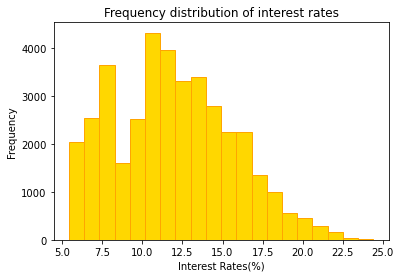

In [35]:
plt.hist(suff_data["int_rate(%)"], bins = 20,edgecolor='Orange',color='gold')
plt.title('Frequency distribution of interest rates')
plt.xlabel('Interest Rates(%)')
plt.ylabel('Frequency')
plt.show()

1. Bulk of the loans are at higher Rate of interest of >=10%
2. Binning the interest rate assuming the indian loan ratesn experience

In [36]:
# Creating borrowed interest label based on the percentiles
suff_data['interestrate_label'] = pd.qcut(suff_data['int_rate(%)'], [0, 0.25, 0.5, 0.75, 1], ["Medium", "High", " Very High", "Exorbitant"])

<font color = blue> Analysing the spread of installments </font>

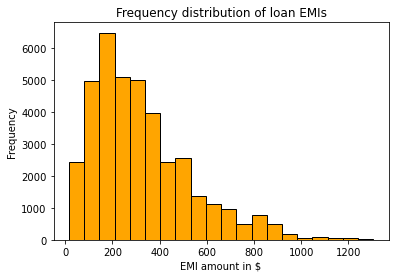

In [37]:
plt.hist(suff_data["installment"], bins = 20,edgecolor='black',color='orange')
plt.title('Frequency distribution of loan EMIs')
plt.xlabel('EMI amount in $')
plt.ylabel('Frequency')
plt.show()


1. Skewed to the left, much of the loans are within the 600K$ EMI

<font color = blue> Analysing the spread of applicant's annual income </font>

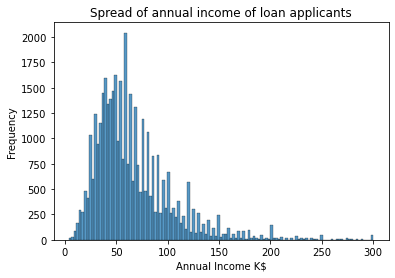

In [38]:
# Since there are lot of outliers in the annual income, only a part (<300K) is considered to see the spread
slist = suff_data[suff_data["annual_inc"] <= 300000]
sns.histplot(slist["annual_inc"]/1000)
plt.title('Spread of annual income of loan applicants')
plt.xlabel('Annual Income K$')
plt.ylabel('Frequency')
plt.show()

1. Bulk of the loan applicants are having <200K USD and the median is around 60K$
2. Binning can be done based on the spread from the above data.

In [39]:
# Creating income_category based on the percentiles of annual_inc
suff_data['income_category'] = pd.qcut(suff_data['annual_inc'], [0, 0.25, 0.5, 0.75, 1], ["Low", "Medium", "High", "Very High"])

<font color = blue> Analysing the spread of dti </font>

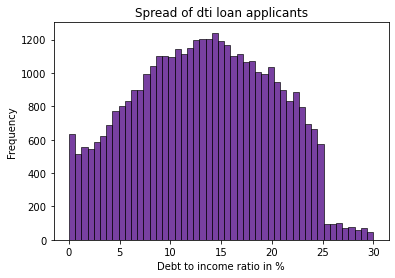

In [40]:
sns.histplot(suff_data["dti"], color='indigo')
plt.title('Spread of dti loan applicants')
plt.xlabel('Debt to income ratio in %')
plt.ylabel('Frequency')
plt.show()

1. There is a drastic fall of dti post 25% may be because of fatigue

<font color = blue> Analysing the geographical spread of applicants </font>

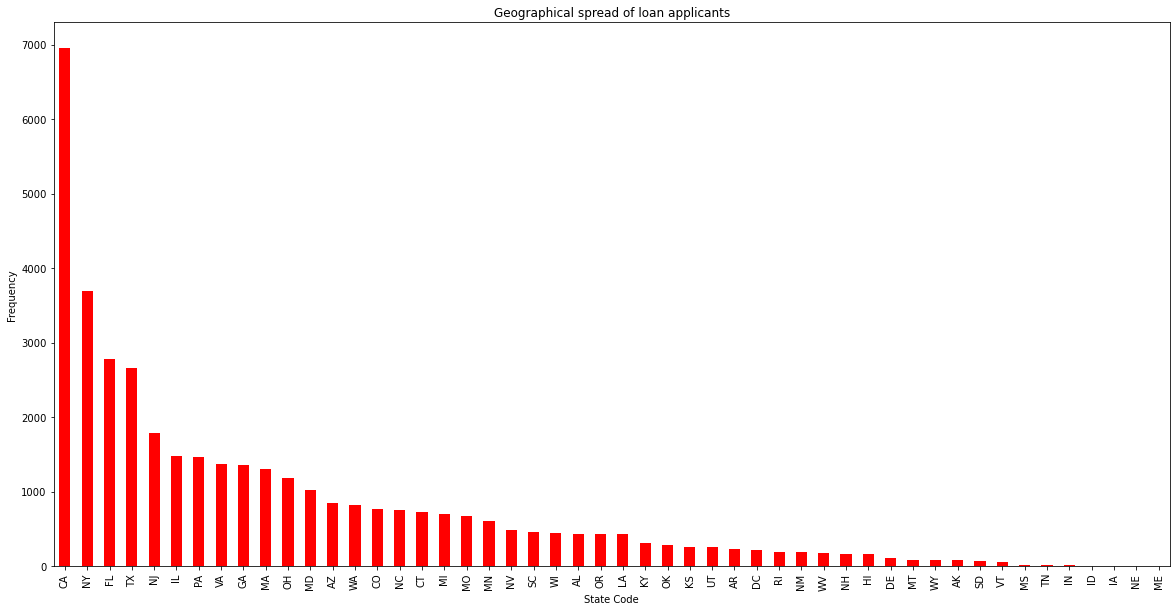

In [41]:
suff_data["addr_state"].value_counts().plot.bar(color='red', figsize=(20, 10))
plt.title('Geographical spread of loan applicants')
plt.xlabel('State Code')
plt.ylabel('Frequency')
plt.show()

1. Loan applications are dominated by CA applicants


<font color = blue> Analysing the Verification status of applicants </font>

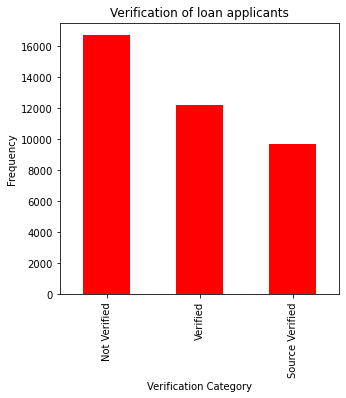

In [42]:
suff_data["verification_status"].value_counts().plot.bar(color='red', figsize=(5, 5))
plt.title('Verification of loan applicants')
plt.xlabel('Verification Category')
plt.ylabel('Frequency')
plt.show()

1. There is significant amount of applications whose income is not verified

### Segmented Univariate Analysis

In [43]:
# Grouping the data based on the loan_status to avoid repetition of the same operation during various analysis
chargedoff_data = suff_data[suff_data["loan_status"] == "Charged Off"]
fullypaid_data = suff_data[suff_data["loan_status"] == "Fully Paid"]

In [44]:
# *** Delete the cell
print(chargedoff_data["emp_length"].value_counts())
print(fullypaid_data["emp_length"].value_counts())
sorted((chargedoff_data["emp_length"].value_counts()/fullypaid_data["emp_length"].value_counts())*100)

10+ years    1331
< 1 year      639
2 years       567
3 years       555
4 years       462
5 years       458
1 year        456
6 years       307
7 years       263
8 years       203
9 years       158
Name: emp_length, dtype: int64
10+ years    7157
< 1 year     3869
2 years      3724
3 years      3457
4 years      2880
5 years      2736
1 year       2713
6 years      1861
7 years      1448
8 years      1232
9 years      1068
Name: emp_length, dtype: int64


[14.794007490636703,
 15.225563909774436,
 16.041666666666668,
 16.054382412496384,
 16.477272727272727,
 16.496507254164428,
 16.515895580253297,
 16.739766081871345,
 16.80796166605234,
 18.162983425414364,
 18.597177588375015]

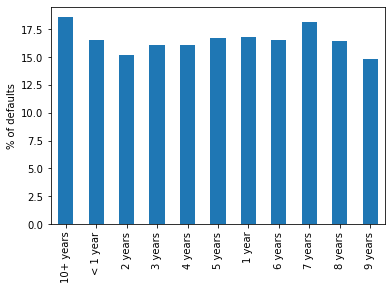

In [45]:
((chargedoff_data["emp_length"].value_counts()/fullypaid_data["emp_length"].value_counts())*100).plot.bar()
plt.ylabel('% of defaults')
plt.show()

<font color = blue> Analysis based on work length </font>

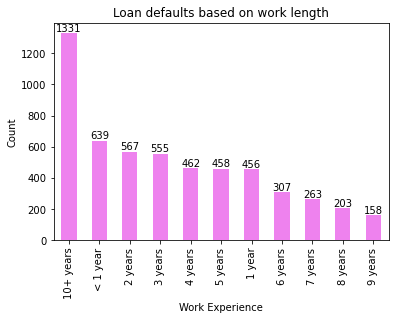

In [46]:
ax = (chargedoff_data["emp_length"].value_counts()).plot.bar(color='violet')
ax.bar_label(ax.containers[0], label_type='edge')
plt.title('Loan defaults based on work length')
plt.xlabel('Work Experience')
plt.ylabel('Count')
plt.show()

#### Taking the relative view so that the fully paid is also considered for the respective category and is not overwhelmed just by the number of defaults in a particular category

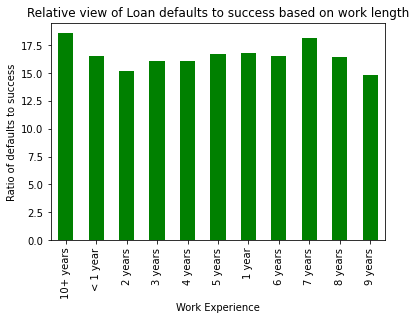

In [47]:
((chargedoff_data["emp_length"].value_counts()/fullypaid_data["emp_length"].value_counts())*100).plot.bar(color='green')

plt.title('Relative view of Loan defaults to success based on work length')
plt.xlabel('Work Experience')
plt.ylabel('Ratio of defaults to success')
plt.show()

`All categories are having the ratios around the same values. So considering the abosulte loan defaults in categories`

### Inference 2 - The loan defaults decrease with increase in work experience. Though there is bigger spike at 10+ its because of all years above 10 years classified under the same bucket. 
### The relative view doesnt give any conclusions as default to success across various categories is more or less the same.

<font color = blue> Loan default analysis based on reason for raising the loan </font>

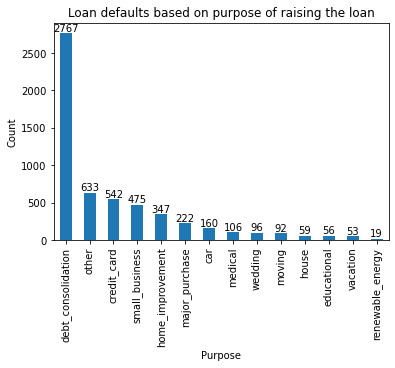

In [48]:
ax = (chargedoff_data["purpose"].value_counts()).plot.bar()
ax.bar_label(ax.containers[0], label_type='edge')
plt.title('Loan defaults based on purpose of raising the loan')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.show()

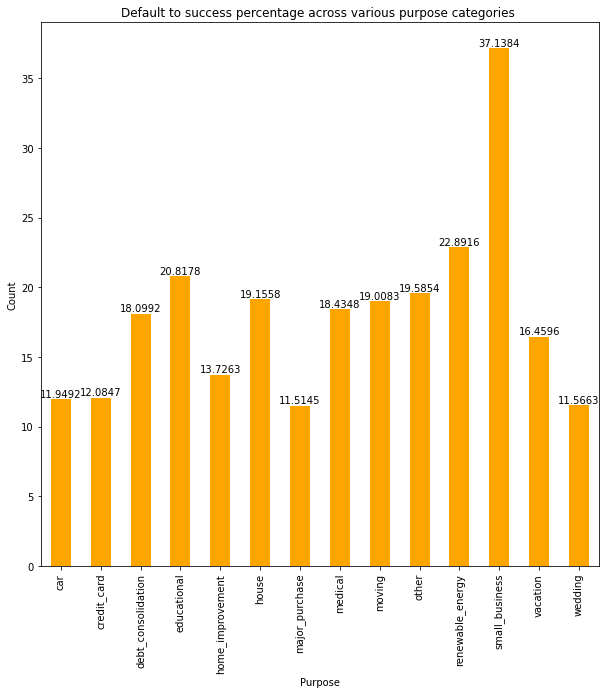

In [49]:
# Getting the relative view of the defaults across purposes for raising the loan

ax = ((chargedoff_data["purpose"].value_counts() *100)/fullypaid_data["purpose"].value_counts()).plot.bar(width= 0.5, align='center',color='orange', figsize=(10, 10))
ax.bar_label(ax.containers[0], label_type='edge')
plt.title('Default to success percentage across various purpose categories ')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.show()

### Inference 3 -  The small_business category has high default to success percentage and needs to be extra careful approving for this category. The relative view for most of the categories except for the 'small_business' doesn't help in making any conclusions. 

### From the absolute view of defaults, debt consolidation has the highest defaults probably because of cascading effect.

<font color = blue> Loan default analysis based on home ownership type </font>

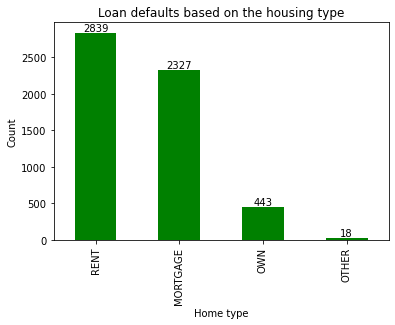

In [50]:
ax = (chargedoff_data["home_ownership"].value_counts()).plot.bar(color='green')
ax.bar_label(ax.containers[0], label_type='edge')
plt.title('Loan defaults based on the housing type')
plt.xlabel('Home type')
plt.ylabel('Count')
plt.show()

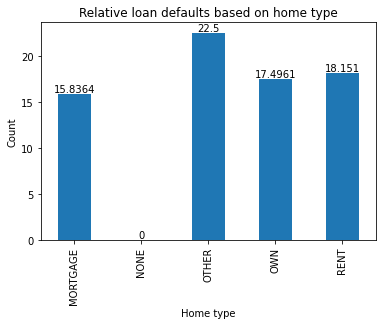

In [51]:
ax = ((chargedoff_data["home_ownership"].value_counts()*100)/ fullypaid_data["home_ownership"].value_counts()).plot.bar()
ax.bar_label(ax.containers[0], label_type='edge')
plt.title('Relative loan defaults based on home type')
plt.xlabel('Home type')
plt.ylabel('Count')
plt.show()

### Inference 4 - The relative view doesn't yield any conclusion for the loan defaults on house type. However the absolute view indicates that the users in own house defaults in less numbers.


<font color = blue> Loan default analysis based on loan grading type </font>

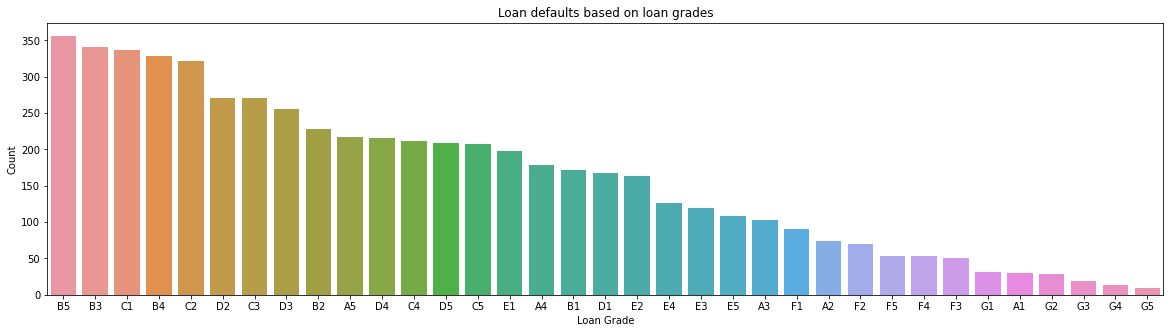

In [52]:
# Getting the counts of various sub-grade categories
tlist = chargedoff_data["sub_grade"].value_counts()

plt.figure(figsize=(20,5))
sns.barplot(x = tlist.index, y = tlist)
plt.title('Loan defaults based on loan grades')
plt.xlabel('Loan Grade')
plt.ylabel('Count')
plt.figsize=(10, 10)
plt.show()

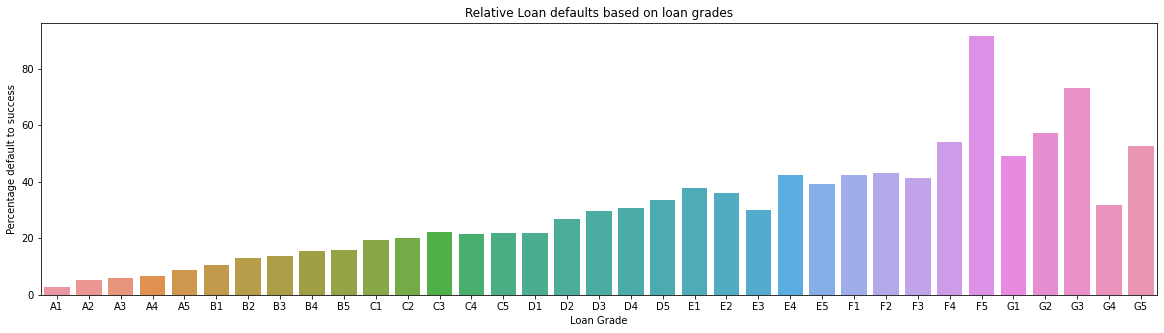

In [53]:
rlist = (chargedoff_data["sub_grade"].value_counts()*100)/fullypaid_data["sub_grade"].value_counts()

plt.figure(figsize=(20,5))
sns.barplot(x = rlist.index, y = rlist)
plt.title('Relative Loan defaults based on loan grades')
plt.xlabel('Loan Grade')
plt.ylabel('Percentage default to success')
plt.figsize=(10, 10)
plt.show()

### Inference 5 - Though the defaults on absolute loan grades gives a different picture, the relative plot has the defaults increasing from Grade - A to Grade - G and the current grading of loans is satisfactory. 

<font color = blue> Loan default analysis based on terms of loan </font>

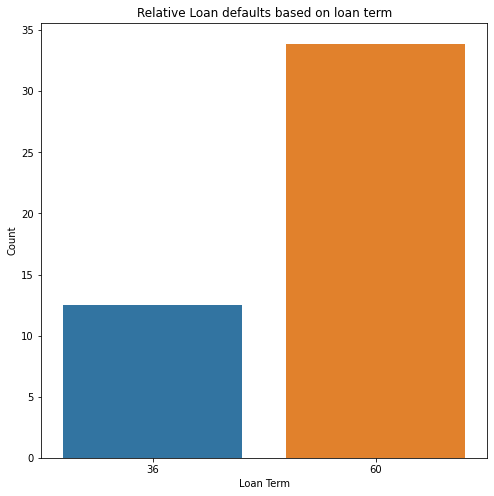

In [54]:
tlist = (chargedoff_data["term in months"].value_counts()*100)/fullypaid_data["term in months"].value_counts()

plt.figure(figsize=(8,8))
sns.barplot(x = tlist.index, y = tlist)
plt.title('Relative Loan defaults based on loan term')
plt.xlabel('Loan Term')
plt.ylabel('Count')
plt.show()

### Inference 6 - It is evident from the above plot that the long term loans nearly defaults triply than the short term loans

### Segmented univariate analysis of important numerical variables

<font color = blue> Checking if annual income has any influence on loan default </font>

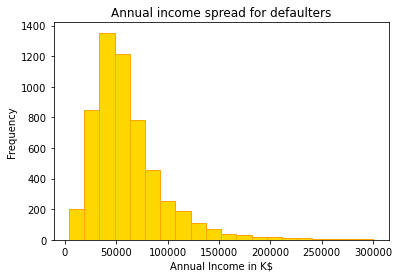

In [55]:
# Since there are lot of outliers, lets restrict the study window to less than 300K $ income
alist = chargedoff_data[chargedoff_data['annual_inc'] <= 300000]


plt.hist(alist["annual_inc"], bins = 20,edgecolor='Orange',color='gold')
plt.title('Annual income spread for defaulters')
plt.xlabel('Annual Income in K$')
plt.ylabel('Frequency')
plt.show()



### Inference 7 - Much of the loan defaults happen for income of applicants having annual income < 150K USD. Peak defaults is at 50K

<font color = blue> Checking if dti has any influence on loan default </font>

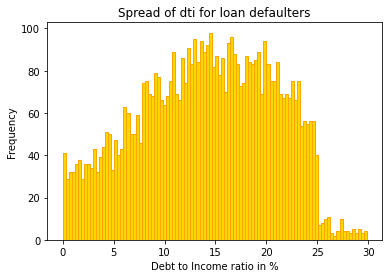

In [56]:
plt.hist(chargedoff_data["dti"], bins = 100,edgecolor='Orange',color='gold')
plt.title('Spread of dti for loan defaulters')
plt.xlabel('Debt to Income ratio in %')
plt.ylabel('Frequency')
plt.show()

<font color = blue> Checking if verification status has any influence on loan default </font>

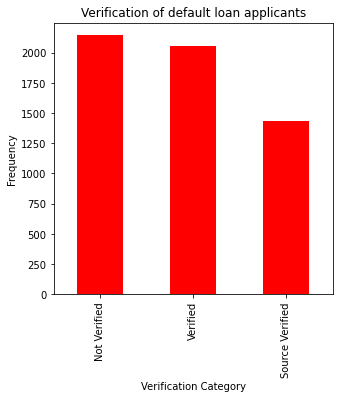

In [57]:
# Plotting the bar chart of various verification categories
chargedoff_data["verification_status"].value_counts().plot.bar(color='red', figsize=(5, 5))
plt.title('Verification of default loan applicants')
plt.xlabel('Verification Category')
plt.ylabel('Frequency')
plt.show()

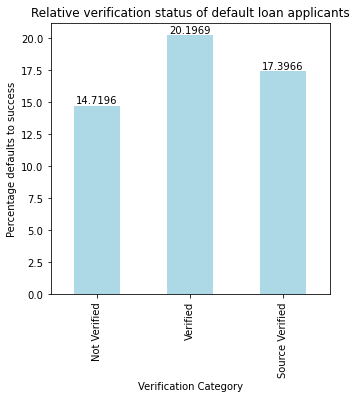

In [58]:
# Getting the relative view of the verification status of various default categories
ax = ((chargedoff_data["verification_status"].value_counts()*100)/fullypaid_data["verification_status"].value_counts()).plot.bar(color='lightblue', figsize=(5, 5))
ax.bar_label(ax.containers[0], label_type='edge')
plt.title('Relative verification status of default loan applicants')
plt.xlabel('Verification Category')
plt.ylabel('Percentage defaults to success')
plt.show()

### Inference 8 - From the above 2 plots we can infer that though the absolute count of defaults for non verified loans is high, when we plot the relative view we get to know that the verified source categories are defaulting more than the non-verified ones. May be we need review the verification process.

<font color = blue> Checking if year has any influence on loan default </font>

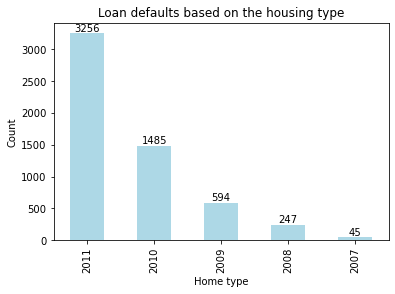

In [59]:
ax = (chargedoff_data["year"].value_counts()).plot.bar(color='lightblue')
ax.bar_label(ax.containers[0], label_type='edge')
plt.title('Loan defaults based on the housing type')
plt.xlabel('Home type')
plt.ylabel('Count')
plt.show()

#### Lots of defaults for loans issued in year 2011

### Bi-Variate analysis

<font color = blue> Having pair-wise plot to have a glimse of the replationship between few numerical variables </font>

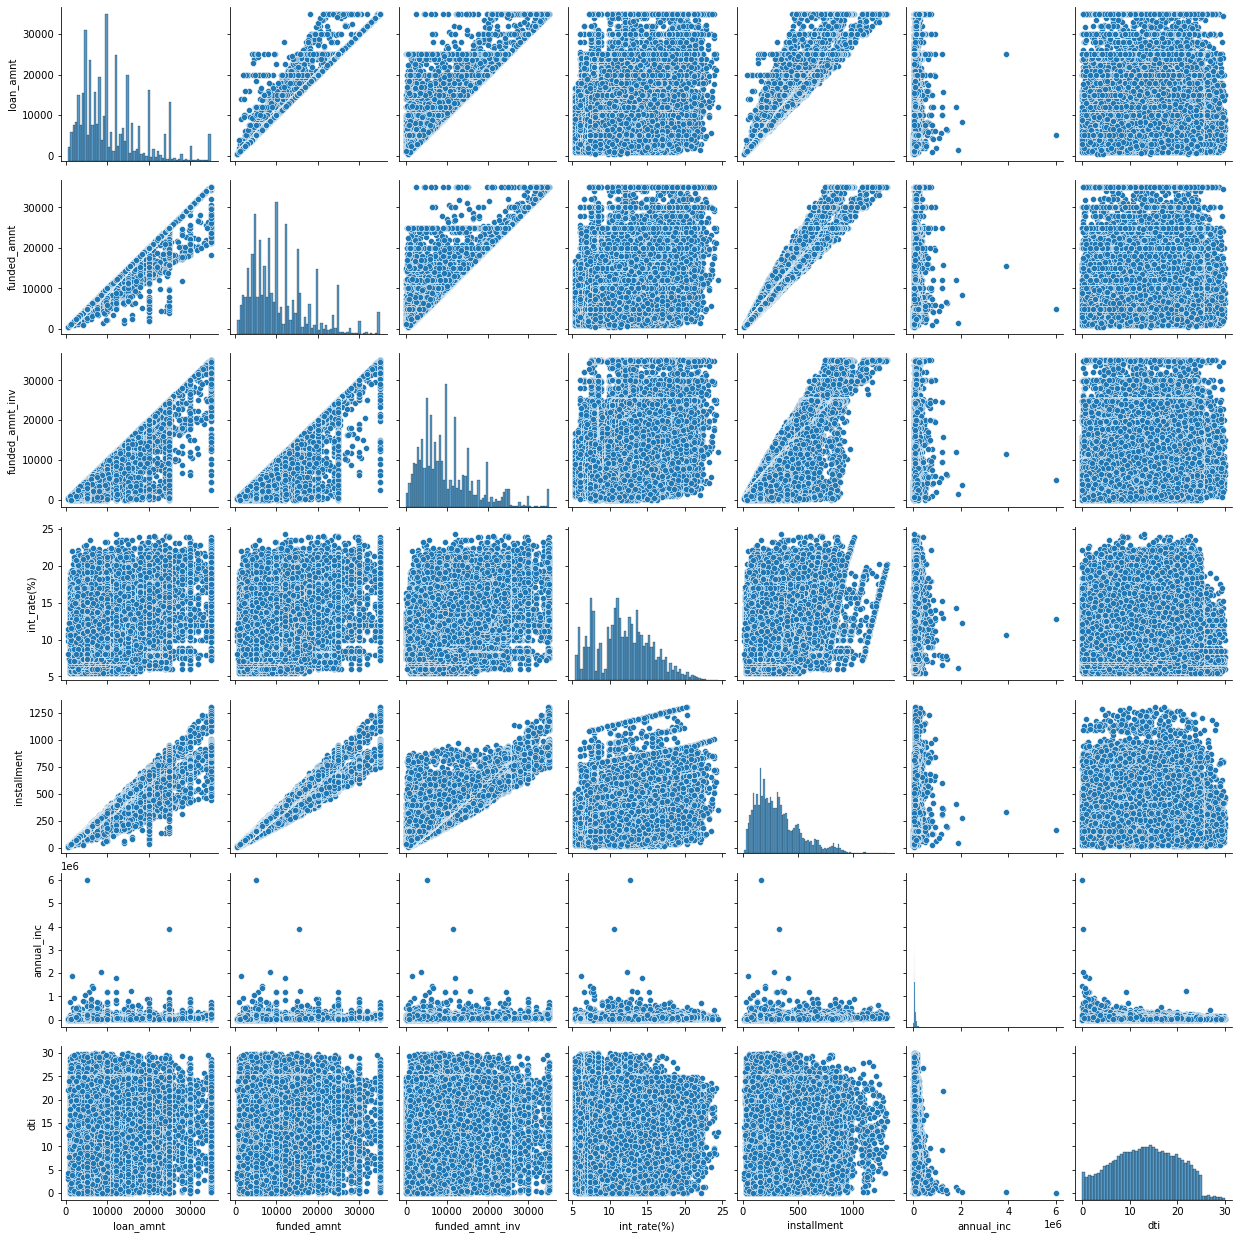

In [60]:
sns.pairplot(suff_data[["loan_amnt","funded_amnt","funded_amnt_inv","int_rate(%)","installment","annual_inc","dti"]])
plt.show()

<font color = blue> Plot the heapmap to have look at the correlation between few numerical variables </font>

In [61]:
# Creating a separate dataframe with select columns to use it in calculating the correlation co-efficient
df2 = suff_data[["loan_amnt","funded_amnt","funded_amnt_inv","int_rate(%)","installment","annual_inc","dti"]]
df3 = df2.corr()
df3.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate(%),installment,annual_inc,dti
loan_amnt,1.000000,0.981790,0.937922,0.301265,0.932260,0.268999,0.062436
funded_amnt,0.981790,1.000000,0.956172,0.304930,0.958035,0.264798,0.062194
funded_amnt_inv,0.937922,0.956172,1.000000,0.297473,0.905464,0.251981,0.070663
int_rate(%),0.301265,0.304930,0.297473,1.000000,0.277203,0.048899,0.110913
installment,0.932260,0.958035,0.905464,0.277203,1.000000,0.267842,0.052038


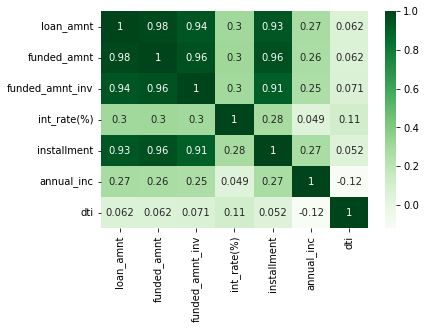

In [62]:
sns.heatmap(df3, cmap = "Greens", annot = True)
plt.show()

### There is no correlation except for the loan_amnt, funded_amnt, funded_amnt_inv and the installments which are naturally tightly coupled

<font color = blue> Analysing with a pivot table the Income category vs home ownership type on default loans </font>

In [63]:
pivot1 = pd.pivot_table(chargedoff_data, index = 'income_category', values = 'loan_status', columns = 'home_ownership',  aggfunc = 'count')
pivot1

home_ownership,MORTGAGE,OTHER,OWN,RENT
income_category,,,,
Low,373,6,196,1176
Medium,576,3,106,757
High,692,6,82,581
Very High,686,3,59,325


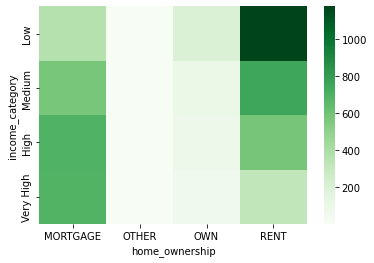

In [64]:
sns.heatmap(pivot1, cmap = "Greens")
plt.show()

### Inference 8 - From the above we can infer that Rented borrower's with low and medium income defaults more. Mortgaged category has across the income levels default.

<font color = blue> Analysing with a pivot table the amount borrowed vs home ownership on default loans </font>

In [65]:
pivot2 = pd.pivot_table(chargedoff_data, index = 'borrowed_amnt_label', values = 'loan_status', columns = 'home_ownership',  aggfunc = 'count')
pivot2

home_ownership,MORTGAGE,OTHER,OWN,RENT
borrowed_amnt_label,,,,
Low,498,6,150,926
Medium,402,1,83,618
High,535,7,99,637
Very High,892,4,111,658


<font color = blue> Analysing with a pivot table the purpose vs interest rate on default loans </font>

In [66]:
pivot3 = pd.pivot_table(chargedoff_data, index = 'purpose', values = 'loan_status', columns = 'interestrate_label',  aggfunc = 'count')
pivot3

interestrate_label,Medium,High,Very High,Exorbitant
purpose,,,,
car,30,51,34,45
credit_card,60,125,154,203
debt_consolidation,238,474,745,1310
educational,5,14,22,15
home_improvement,40,80,107,120
house,2,9,12,36
major_purchase,37,43,67,75
medical,11,28,30,37
moving,17,30,20,25


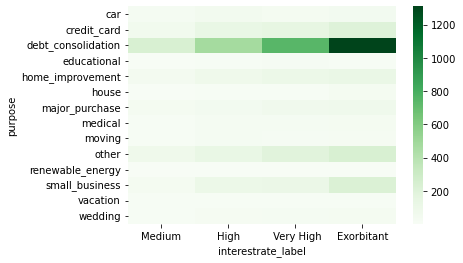

In [67]:
sns.heatmap(pivot3, cmap = "Greens")
plt.show()

### Inference 9 - People borrowing loans at exorbitant interest rates for debt consolidation are highest loan defaulters

<font color = blue> Analysing with a pivot table to check if any inference possible with the state vs income category on default loans </font>

In [68]:
pivot4 = pd.pivot_table(chargedoff_data, index = 'addr_state', values = 'loan_status', columns = 'income_category',  aggfunc = 'count')
pivot4

income_category,Low,Medium,High,Very High
addr_state,,,,
AK,2,3,7,3
AL,22,15,10,7
AR,13,4,6,4
AZ,42,28,30,23
CA,311,274,291,249
CO,29,32,24,13
CT,27,24,27,16
DC,4,2,2,7
DE,4,2,3,3


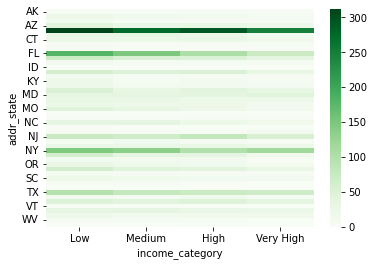

In [69]:
sns.heatmap(pivot4, cmap = "Greens")
plt.show()

<font color = blue> Analysing with a pivot table the verification status vs income category on default loans </font>

In [70]:
pivot5 = pd.pivot_table(chargedoff_data, index = 'verification_status', values = 'loan_status', columns = 'income_category',  aggfunc = 'count')
pivot5

income_category,Low,Medium,High,Very High
verification_status,,,,
Not Verified,820,579,475,268
Source Verified,491,368,339,236
Verified,440,495,547,569


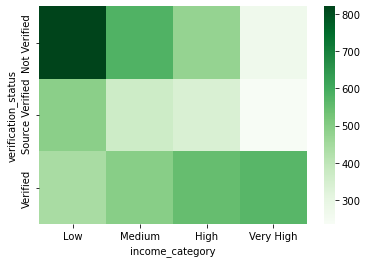

In [71]:
sns.heatmap(pivot5, cmap = "Greens")
plt.show()

In [72]:
pivot6 = pd.pivot_table(chargedoff_data, index = 'income_category', values = 'loan_status', columns = 'interestrate_label',  aggfunc = 'count')
pivot6

interestrate_label,Medium,High,Very High,Exorbitant
income_category,,,,
Low,232,396,528,595
Medium,169,290,397,586
High,113,253,348,647
Very High,71,184,265,553


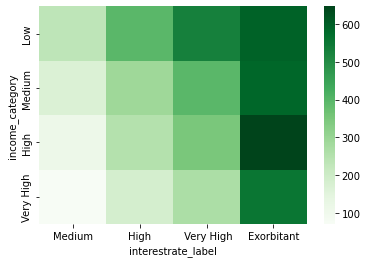

In [73]:
sns.heatmap(pivot6, cmap = "Greens")
plt.show()

#### Tried checking from the above 2 pivot tables and plots if low income, with higher rate of interest are going un-verified

<font color = blue> Analysing with a pivot table the verification status vs interest rates on default loans </font>

In [74]:
pivot7 = pd.pivot_table(chargedoff_data, index = 'verification_status', values = 'loan_status', columns = 'interestrate_label',  aggfunc = 'count')
pivot7

interestrate_label,Medium,High,Very High,Exorbitant
verification_status,,,,
Not Verified,301,541,675,625
Source Verified,143,274,330,687
Verified,141,308,533,1069


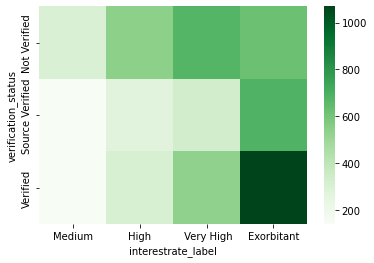

In [75]:
sns.heatmap(pivot7, cmap = "Greens")
plt.show()

### Inference 11 - Unverified income borrowers' are the highest defaulters over majority of the interest slab loans.